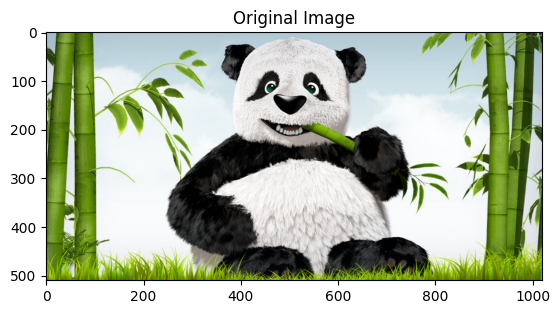

Image Size: 510x1020 pixels, Channels: 3
Total Image Pixels: 520200


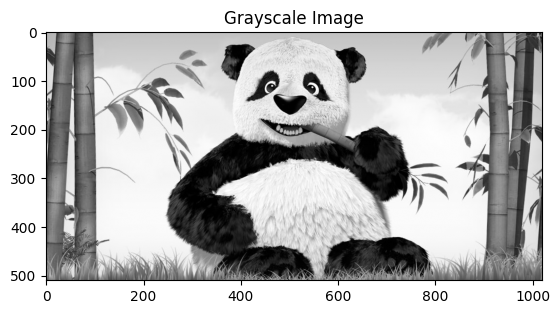

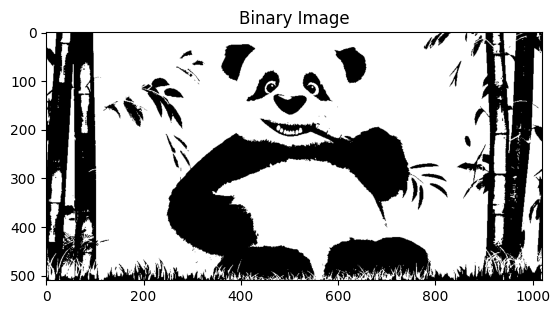

Black Pixels Area (in binary image): 176904
Binary Image Size: 510x1020 pixels


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the image
image = cv2.imread('Lab3.png')

# Step 2: Display the original image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.show()

# Step 3: Extract image size
height, width, channels = image.shape
print(f"Image Size: {height}x{width} pixels, Channels: {channels}")

# Step 4: Calculate total image pixels
total_pixels = height * width
print(f"Total Image Pixels: {total_pixels}")

# Step 5: Convert RGB to Grayscale image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 6: Convert RGB to Grayscale and Binary image using threshold
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# i. Count the area of black pixels (0 pixels) in the binary image
black_pixels = np.sum(binary_image == 0)

# ii. Size of the binary image (it's the same size as the original)
binary_image_size = binary_image.shape

# Display Grayscale and Binary images
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.show()

plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image")
plt.show()

# Print the results
print(f"Black Pixels Area (in binary image): {black_pixels}")
print(f"Binary Image Size: {binary_image_size[0]}x{binary_image_size[1]} pixels")


Saving website.jpg to website (1).jpg
Image uploaded successfully.


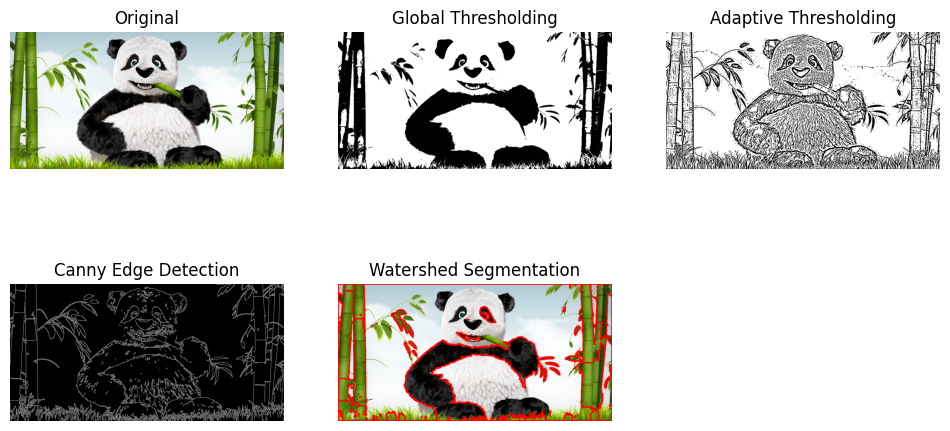

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
for filename in uploaded.keys():
    image_path = filename

img = cv2.imread(image_path)

if img is None:
    print("Error: Could not read the image.")
else:
    print("Image uploaded successfully.")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, global_thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    adaptive_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    edges = cv2.Canny(gray, 100, 200)
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
    sure_bg = cv2.dilate(opening, kernel, iterations=3)
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)
    _, markers = cv2.connectedComponents(global_thresh)
    markers = markers + 1
    markers[unknown == 255] = 0
    img_watershed = img.copy()
    cv2.watershed(img_watershed, markers)
    watershed_result = img.copy()

    boundary_mask = np.uint8(markers == -1) * 255
    kernel_dilate = np.ones((3, 3), np.uint8)
    thick_boundaries = cv2.dilate(boundary_mask, kernel_dilate, iterations=2)
    watershed_result[thick_boundaries == 255] = [0, 0, 255]
    titles = ["Original", "Global Thresholding", "Adaptive Thresholding", "Canny Edge Detection", "Watershed Segmentation"]
    images = [img, global_thresh, adaptive_thresh, edges, watershed_result]

    plt.figure(figsize=(12, 6))
    for i in range(5):
        plt.subplot(2, 3, i + 1)
        if i == 0 or i == 4:
            plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        else:
            plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()